# Ramen Ratings

I saw this interesting dataset on Kaggle and wanted to explore it a bit. 

This data was extracted from [The Big List](https://www.theramenrater.com/resources-2/the-list/) at The Ramen Rater website

Before starting, the xlrd package needs to be installed prior to being able to read in the excel file from the url.

This notebook uses the following packages:
- pandas
- seaborn
- matplotlib


In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd

df = pd.read_excel('https://www.theramenrater.com/wp-content/uploads/2020/01/The-Ramen-Rater-The-Big-List-1-3400-Current-As-Of-Jan-25-2020.xlsx',
                  converters = {'Review #': str, 'Stars': str})

In [81]:
print(df.shape)
df.head()

(3400, 6)


,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25


Checking for any missing values

In [82]:
df.isnull().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

Looking at the datatype for each column shows that the 'Stars' column is not all numerical data

In [83]:
df.dtypes

Review #    object
Brand       object
Variety     object
Style       object
Country     object
Stars       object
dtype: object

Looking at the unique values in the 'Stars' column, we see that there are a few values which will cause issues when we try and convert to a float. We will go ahead and filter out all non-numerical values:
- 'NR'
- 'Unrated'
- Any values with a hyphen or backslash 

In [84]:
df['Stars'].unique()

array(['1', '5', '2', '2.25', '3', '3.5', '4.5', '2.75', '3.75', '0',
       '3.25', '4.25', '2.5', '4', '0.5', '4.75', '1.5', '1.25', 'NR',
       '1.75', '0.25', '3.5/2.5', '2017-04-04 00:00:00',
       '2017-05-05 00:00:00', '4.5/5', '5/2.5', '2017-05-04 00:00:00',
       '4.25/5', 'Unrated', '0.75', '1.1', '2.1', '0.9', '3.1', '4.125',
       '3.125', '2.125', '2.9', '0.1', '2.8', '3.7', '3.4', '3.6', '2.85',
       '2.3', '3.2', '3.65', '1.8'], dtype=object)

In [90]:
df_filtered = df[~df['Stars'].str.contains('-|/|NR|Unrated')]

In [109]:
df_filtered.head()

,Review #,Brand,Variety,Style,Country,Stars
0,3400,EDO Pack,Kumamoto Flavour Noodles,Cup,Hong Kong,1.00
1,3399,Pan Mee,Goreng Dried Chili Shrimp Flavour,Pack,Malaysia,5.00
2,3398,Paldo,King Lid Ramen Noodle Soup,Pack,South Korea,5.00
3,3397,Nissin Miojo,Cremoso Carno Com Chili,Pack,Brazil,2.00
4,3396,Samyang Foods,Cham Ramen Big Bowl,Bowl,South Korea,2.25


In [107]:
df_filtered.loc[:,'Stars'] = pd.to_numeric(df_filtered['Stars'],errors='coerce', downcast = 'float')

In [108]:
df_filtered.dtypes

Review #     object
Brand        object
Variety      object
Style        object
Country      object
Stars       float32
dtype: object

Now we see that all values in the 'Stars' column have been converted to float and we can start analyzing and making some visualizations

In [117]:
df_filtered.describe()

,Stars
count,3386.000000
mean,3.699321
std,1.038873
min,0.000000
25%,3.250000
50%,3.750000
75%,4.500000
max,5.000000


Looking at the top 10 count by Country, we observe that a majority of the ramen reviews are for Japan and US

In [130]:
df['Country'].value_counts()[:10]

Japan            606
United States    419
South Korea      383
Taiwan           351
China            217
Thailand         208
Malaysia         190
Hong Kong        159
Indonesia        152
Singapore        136
Name: Country, dtype: int64

The most popular brands are Nissin (Japan), Maruchan (USA), and Nongshim (South Korea)

In [133]:
df['Brand'].value_counts()[:10]

Nissin             460
Maruchan           120
Nongshim           113
Myojo               96
Samyang Foods       93
Paldo               76
Mama                71
Indomie             56
Sapporo Ichiban     54
Ottogi              48
Name: Brand, dtype: int64

Saving the top 10 values for both Country and Brand for later use

In [188]:
Country_Top10 = df['Country'].value_counts()[:10].index.values.tolist()
Brand_Top10 = df['Brand'].value_counts()[:10].index.values.tolist()

In [190]:
grouped_country = df_filtered.groupby(['Country']).mean()

In [192]:
grouped_country.loc[grouped_country.index.isin(Country_Top10)].sort_values('Stars',ascending = False)

,Stars
Country,
Malaysia,4.166138
Indonesia,4.111842
Singapore,4.108456
Japan,3.916045
South Korea,3.859449
Taiwan,3.844587
Hong Kong,3.794025
United States,3.507603
China,3.463364


In [193]:
grouped_brand = df_filtered.groupby(['Brand']).mean()

In [194]:
grouped_brand.loc[grouped_brand.index.isin(Brand_Top10)].sort_values('Stars',ascending = False)

,Stars
Brand,
Samyang Foods,4.095109
Indomie,4.089286
Paldo,4.016448
Nongshim,4.006637
Nissin,3.904076
Myojo,3.846354
Sapporo Ichiban,3.782408
Mama,3.628873
Maruchan,3.603125


In [134]:
from matplotlib import pyplot as plt
import seaborn as sns

From the graph, the Box ramen has much higher reviews than all other forms

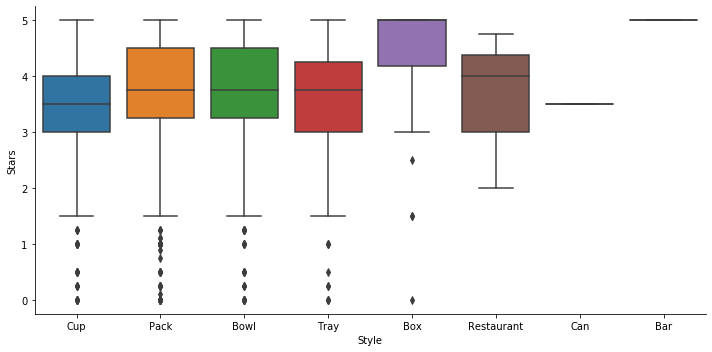

In [144]:
sns.catplot(data=df_filtered, x='Style', y='Stars', kind='box', height=5, aspect = 2);

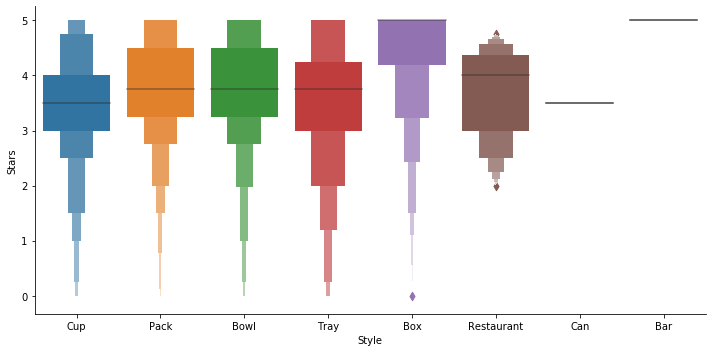

In [198]:
sns.catplot(data=df_filtered, x='Style', y='Stars', kind='boxen', height=5, aspect = 2);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

In [ ]:
#Bubble plot with size equivalent to number of ramen reviews
#Country on x axis (Top 10)
#Review on Y axis

In [ ]:
#Bubble plot with size equivalent to number of ramen reviews
#Brand on x axis (Top 10)
#Review on Y axis